* My data pertains to restaurant and market health violations in Los Angeles. I find this topic very interesting because Los Angeles is a well-known city presented to us particularly through the media in a positive light. This data set shows that not everything on media is as perfect as it seems. The data set includes the serial number, which shows who owns the restaurant, the activity date the inspection was conducted, what each restaurant violated and their descriptions, a risk in the restaurant, and the reason for the inspection.

In [98]:
import pandas as pd

In [99]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (6, 6)

In [103]:
restaurants = pd.read_csv("restaurant-and-market-health-violations.csv")

In [104]:
restaurants.shape

(65534, 25)

In [105]:
restaurants.dtypes

serial_number            object
activity_date            object
facility_name            object
violation_code           object
violation_description    object
violation_status         object
points                    int64
grade                    object
facility_address         object
facility_city            object
facility_id              object
facility_state           object
facility_zip             object
employee_id              object
owner_id                 object
owner_name               object
pe_description           object
program_element_pe        int64
program_name             object
program_status           object
record_id                object
score                     int64
service_code              int64
service_description      object
row_id                   object
dtype: object

## Data Dictionary

* serial_number            object
* activity_date            object
* facility_name            object
* violation_code           object
* violation_description    object
* violation_status         object
* points                    int64
* grade                    object
* facility_address         object
* facility_city            object
* facility_id              object
* facility_state           object
* facility_zip             object
* employee_id              object
* owner_id                 object
* owner_name               object
* pe_description           object
* program_element_pe        int64
* program_name             object
* program_status           object
* record_id                object
* score                     int64
* service_code              int64
* service_description      object
* row_id                   object

## Entity Description

* serial_number
* facility_name
* violation_code


In [107]:
restaurants.to_csv("restaurant-and-market-health-violations.1.initial_process.csv", index=False)

In [108]:
restaurants['unique'] = restaurants.serial_number.str.cat([restaurants.facility_name, restaurants.violation_code], sep = "-")

In [109]:
restaurants[["serial_number","facility_name","violation_code","owner_id","unique"]].head()

,serial_number,facility_name,violation_code,owner_id,unique
0,DA08R0TCU,KRUANG TEDD,F030,OW0001034,DA08R0TCU-KRUANG TEDD-F030
1,DA08R0TCU,KRUANG TEDD,F027,OW0001034,DA08R0TCU-KRUANG TEDD-F027
2,DA08R0TCU,KRUANG TEDD,F035,OW0001034,DA08R0TCU-KRUANG TEDD-F035
3,DA08R0TCU,KRUANG TEDD,F033,OW0001034,DA08R0TCU-KRUANG TEDD-F033
4,DA08R0TCU,KRUANG TEDD,F029,OW0001034,DA08R0TCU-KRUANG TEDD-F029


In [110]:
restaurants.unique.value_counts()

DAMEI2ZAL-ZUMA KITCHEN-F052                              1
DAPNQXQCA-YARD HOUSE-F054                                1
DABAUZJJR-NUMERO UNO MARKET (MEAT)-F023                  1
DAAHSIEZP-SUBWAY #12851-F023                             1
DAESPSJMG-MORRISON HEALTH CARE-F033                      1
DAUEC8QLP-TAMARIND OF L.A.-F014                          1
DAEMIJKI6-NORTHGATE MARKETS #38-F014                     1
DAQIP0ZDM-FATBURGER # 109-F048                           1
DAL0JSEOB-#1 DONUTS-F037                                 1
DADTPNMXK-FATBURGER-F046                                 1
DAQEM8UYZ-DOLLARMAX #5-F048                              1
DARCOKCCM-DAILY DONUT-F055                               1
DA00T6H2K-FENG MAO II-F035                               1
DAOMFEOOH-FUNDAMENTAL LA-F044                            1
DANWIUOGF-KAILEY'S RESTAURANT-F006                       1
DAIY00S29-PATRA'S DRIVE-IN-F055                          1
DAOKSGRRR-LA CREME CAFE-F035                            

In [111]:
restaurants[restaurants.duplicated()].shape

(0, 26)

In [112]:
#no duplicates
del restaurants['unique']

In [113]:
n_records = len(restaurants)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{}({}) | COMMON: {:.2f}%| UNCOMMON:{} observation/s".format(
            df[column].name,
            df[column].dtype,
            100 * most_common / (1.0 * n_records),
            least_common,
        ))

duplicate_values_col(restaurants)

serial_number(object) | COMMON: 0.03%| UNCOMMON:1 observation/s
activity_date(object) | COMMON: 1.12%| UNCOMMON:1 observation/s
facility_name(object) | COMMON: 0.63%| UNCOMMON:1 observation/s
violation_code(object) | COMMON: 11.17%| UNCOMMON:1 observation/s
violation_description(object) | COMMON: 11.17%| UNCOMMON:1 observation/s
violation_status(object) | COMMON: 100.00%| UNCOMMON:1 observation/s
points(int64) | COMMON: 74.58%| UNCOMMON:221 observation/s
grade(object) | COMMON: 86.86%| UNCOMMON:1158 observation/s
facility_address(object) | COMMON: 0.63%| UNCOMMON:1 observation/s
facility_city(object) | COMMON: 100.00%| UNCOMMON:65534 observation/s
facility_id(object) | COMMON: 0.63%| UNCOMMON:1 observation/s
facility_state(object) | COMMON: 100.00%| UNCOMMON:65534 observation/s
facility_zip(object) | COMMON: 4.35%| UNCOMMON:1 observation/s
employee_id(object) | COMMON: 7.51%| UNCOMMON:1 observation/s
owner_id(object) | COMMON: 0.63%| UNCOMMON:1 observation/s
owner_name(object) | COMMON

### Low Cardinality
* points
* grade
* facility_city 
* facility_state
* program_status, 
* service_code
* service_description

In [114]:
restaurants.points.value_counts(normalize = True)

1     0.745781
2     0.189413
4     0.042817
0     0.014878
11    0.003739
3     0.003372
Name: points, dtype: float64

In [115]:
#most restaurants received one point for violations

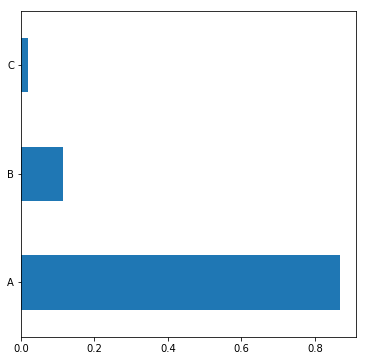

In [116]:
restaurants.grade.value_counts(normalize=True).plot.barh();


* low cardinality: grades received by LA restaurants are A's, B's, and C's

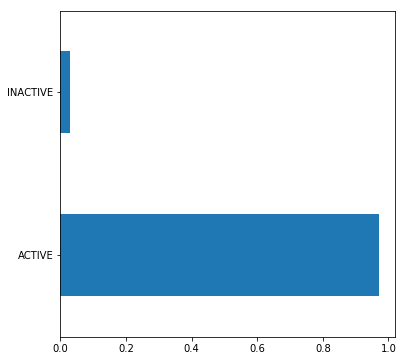

In [117]:
restaurants.program_status.value_counts(normalize=True).plot.barh();

* low cardinality: inactive or active for program_status

In [118]:
n_records = len(restaurants)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(restaurants)

serial_number | 0.0 | object
activity_date | 0.0 | object
facility_name | 0.0 | object
violation_code | 0.0 | object
violation_description | 0.0 | object
violation_status | 0.0 | object
points | 0.0 | int64
grade | 0.0 | object
facility_address | 0.0 | object
facility_city | 0.0 | object
facility_id | 0.0 | object
facility_state | 0.0 | object
facility_zip | 0.0 | object
employee_id | 0.0 | object
owner_id | 0.0 | object
owner_name | 0.0 | object
pe_description | 0.0 | object
program_element_pe | 0.0 | int64
program_name | 0.0 | object
program_status | 0.0 | object
record_id | 0.0 | object
score | 0.0 | int64
service_code | 0.0 | int64
service_description | 0.0 | object
row_id | 0.0 | object


* no missing values in all columns

In [119]:
from scipy import stats
import numpy as np

In [120]:
# we can take a sample column to see its outliers
column = "points"
print(f"the average for column {column} is {restaurants[column].mean()}")
#we consider outliers those observations with a z score (absolute) greater than 3
restaurants[(np.abs(stats.zscore(restaurants[column])) > 3)].head(10)

the average for column points is 1.347117526779992


,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
336,DACZOX7XY,2018-03-29T00:00:00.000,CHUNG KING CAFE HOUSE,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,C,4578 WHITTIER BLVD,LOS ANGELES,...,L & J CUISINE INC.,RESTAURANT (31-60) SEATS HIGH RISK,1635,CHUNG KING CAFE HOUSE,ACTIVE,PR0177919,71,1,ROUTINE INSPECTION,DACZOX7XYF023
718,DAECNUPEV,2018-03-28T00:00:00.000,LITTLE CAESAR'S PIZZA #5901,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,B,900 N VERMONT AVE,LOS ANGELES,...,"LITTLE CAESAR, INC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,LITTLE CAESAR'S PIZZA #5901,ACTIVE,PR0032599,86,1,ROUTINE INSPECTION,DAECNUPEVF023
1746,DAGWQH0XG,2018-03-22T00:00:00.000,POLLITOS DELI,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,C,7609 S MAIN ST,LOS ANGELES,...,MIRIAM GARCIA,RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLITOS DELI,ACTIVE,PR0206156,77,1,ROUTINE INSPECTION,DAGWQH0XGF023
1796,DALIZXELZ,2018-03-22T00:00:00.000,EAST LA MARKET & LIQUOR,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,B,530 N FICKETT ST,LOS ANGELES,...,MANPREET SINGH,"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,EAST LA MARKET & LIQUOR,ACTIVE,PR0206776,83,1,ROUTINE INSPECTION,DALIZXELZF023
2078,DAAZQLCIB,2018-03-21T00:00:00.000,LA INCOMPARABLE MARKET,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,C,4140 WHITTIER BLVD,LOS ANGELES,...,LIEN C LAM,"FOOD MKT RETAIL (2,000+ SF) HIGH RISK",1615,LA INCOMPARABLE MARKET,ACTIVE,PR0206192,72,1,ROUTINE INSPECTION,DAAZQLCIBF023
2321,DAO0SNRCG,2018-03-21T00:00:00.000,OK CHINESE FOOD FRIED CHICKEN AND HAMBURGER,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,B,3592 E 1ST ST,LOS ANGELES,...,YOULA TAING,RESTAURANT (0-30) SEATS HIGH RISK,1632,OK CHINESE FOOD FRIED CHICKEN AND HAMBURGER,ACTIVE,PR0164925,86,1,ROUTINE INSPECTION,DAO0SNRCGF023
2774,DAHDGL9NP,2018-03-20T00:00:00.000,EL RINCON OAXAQUENO,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,B,1544 N WESTERN AVE,LOS ANGELES,...,"CRUZ, FILBERTO",RESTAURANT (31-60) SEATS HIGH RISK,1635,EL RINCON OAXAQUENO,ACTIVE,PR0046717,85,1,ROUTINE INSPECTION,DAHDGL9NPF023
2906,DAIG5H0X5,2018-01-10T00:00:00.000,GOOPOJIB,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,B,3071 W 8TH ST,LOS ANGELES,...,EUN JU PARK,RESTAURANT (0-30) SEATS HIGH RISK,1632,GOOPOJIB,ACTIVE,PR0144504,83,1,ROUTINE INSPECTION,DAIG5H0X5F023
3304,DARTQ0HEU,2018-03-19T00:00:00.000,PAULS KITCHEN,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,11,B,1012 S SAN PEDRO ST,LOS ANGELES,...,ENTERPRISES INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PAULS KITCHEN,ACTIVE,PR0015108,88,1,ROUTINE INSPECTION,DARTQ0HEUF023
3572,DARKJUXOX,2018-03-16T00:00:00.000,MELROSE SHELL #0409,F022,# 22. Sewage and wastewater properly disposed,OUT OF COMPLIANCE,11,B,4501 MELROSE AVE,LOS ANGELES,...,RADC ENTERPRISES INC,"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,MELROSE SHELL #0409,ACTIVE,PR0196466,84,1,ROUTINE INSPECTION,DARKJUXOXF022


In [121]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(restaurants)

points | 245 | int64
program_element_pe | 0 | int64
score | 1122 | int64
service_code | 1323 | int64


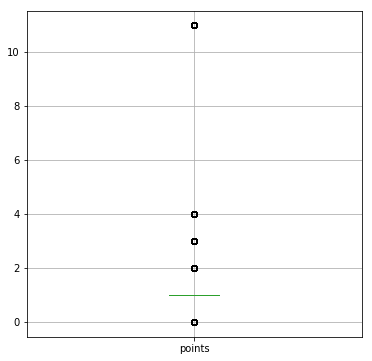

In [122]:
restaurants.boxplot(column='points');

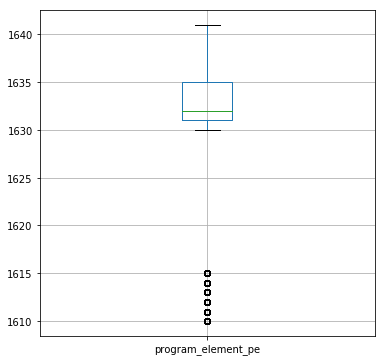

In [123]:
restaurants.boxplot(column='program_element_pe');

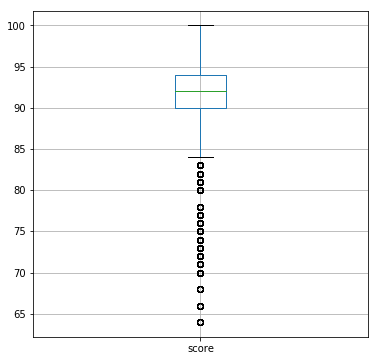

In [124]:
restaurants.boxplot(column='score');

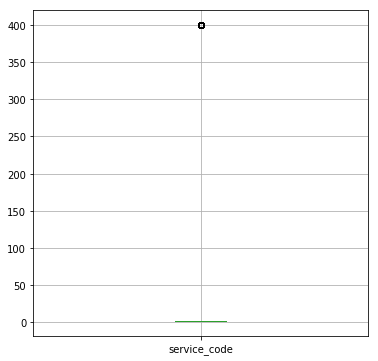

In [125]:
restaurants.boxplot(column='service_code');

In [126]:
restaurants[restaurants.points == 11].grade.unique()

array(['C', 'B'], dtype=object)

In [127]:
restaurants.grade.unique()

array(['A', 'B', 'C'], dtype=object)

In [128]:
too_many_violations = restaurants[restaurants.points > 4]

In [129]:
outliers_col(too_many_violations)

points | 0 | int64
program_element_pe | 0 | int64
score | 3 | int64
service_code | 6 | int64


/Users/jerenbaum/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2281: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/Users/jerenbaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [130]:
too_many_violations[np.abs(stats.zscore(too_many_violations['service_code'])) > 3].points.value_counts(normalize = True)

11    1.0
Name: points, dtype: float64

### Conclusion

* There are no duplicate rows to remove.
* A majority of the restaurants received a 1 point violation.
* There are outliers in score and service_code.

In [131]:
import pandas as pd
import numpy as np

In [132]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,6)

In [135]:
import pandas as pd
restaurants.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029


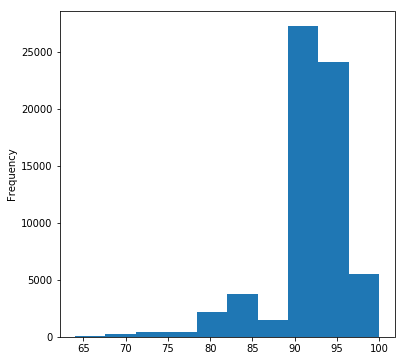

In [136]:
restaurants['score'].plot.hist()

##### The histogram above shows that the grades are right-skewed. Most restaurants received an A for their inspections. 

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #data visualization library --> makes matplotlib charts look nicer
from IPython.display import Image

In [138]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (6,6)


In [139]:
from ipywidgets import interact, fixed

In [141]:
from scipy import stats

In [145]:
def categorical_variable_distribution(col):
    restaurants[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

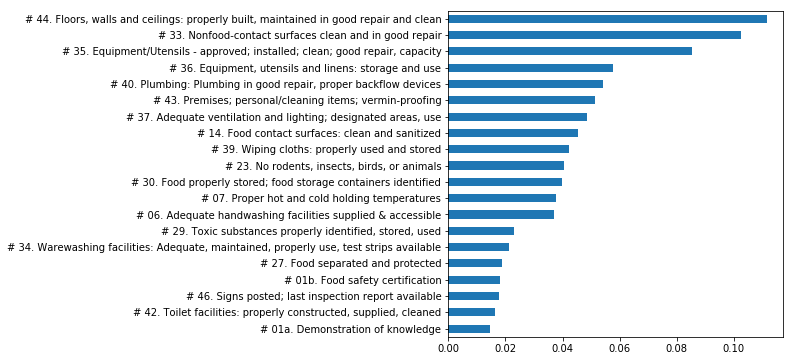

In [147]:
categorical_variable_distribution('violation_description')

##### As shown above, more than 10 percent of the inspection results given pertain to floors, walls, and ceilings being properly built, well-maintained, and clean. Also, the most inspection results given are positive--which is probably very comforting to LA tourists eating at these restaurants.

In [153]:
categorical_columns = restaurants.select_dtypes(
    ['object', 'category']).columns.tolist()

categorical_columns

['serial_number',
 'activity_date',
 'facility_name',
 'violation_code',
 'violation_description',
 'violation_status',
 'grade',
 'facility_address',
 'facility_city',
 'facility_id',
 'facility_state',
 'facility_zip',
 'employee_id',
 'owner_id',
 'owner_name',
 'pe_description',
 'program_name',
 'program_status',
 'record_id',
 'service_description',
 'row_id']

In [154]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('serial_number', 'activity_date', 'facility_name', …

#### It does not surprise me that restaurants in LA tend to have seat risks, especially because of how popular Los Angeles is.

#### Most of the inspections conducted were routine inspections, which went very well. 